In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

base_path = '/content/drive/My Drive'
sub_path = '/colab_python/python_ez'
my_path = base_path + sub_path + '/datafile/house-price-clean.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
house_df = pd.read_csv(my_path)

In [3]:
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

plt.rc('font', family='NanumBarunGothic') 

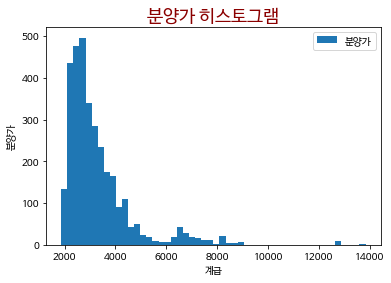

In [4]:
#분양가별 histogram
plt.hist(house_df['분양가'], bins=50, label='분양가')
plt.title('분양가 히스토그램', fontdict={'size':18, 'color':'darkred'})
plt.xlabel('계급')
plt.ylabel('분양가')
plt.legend()
plt.show()

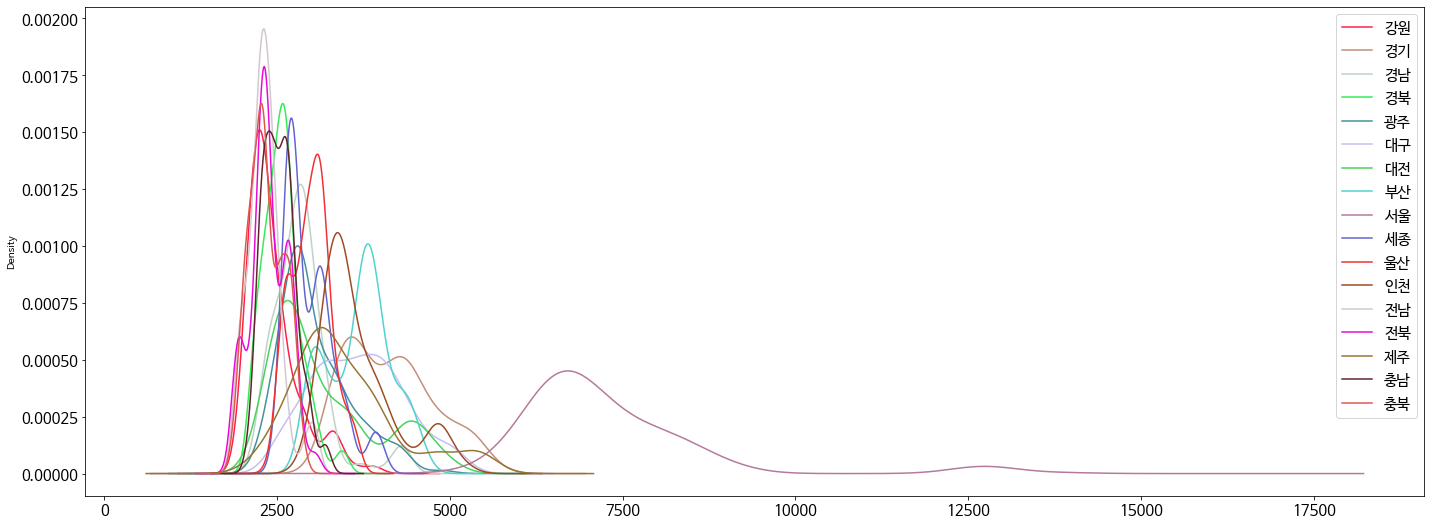

In [8]:
#지역별 분양가의 kernal density estimation
import random

region_list = house_df.groupby('지역').agg('count').index
#color_list = ['red','orange','yellow','green','blue','darkblue','purple']
for i in range(len(region_list)):
  house_df[house_df['지역']==region_list[i]]['분양가'].plot(
      kind='kde',
      color = (random.random(),random.random(),random.random()), #color_list[random.randint(1,6)], #'#' + str(random.randint(100000,999999)) ,
      label= region_list[i],
      fontsize=15
      )
plt.legend(fontsize=15)
plt.rcParams['figure.figsize'] = (24, 9)
plt.show()

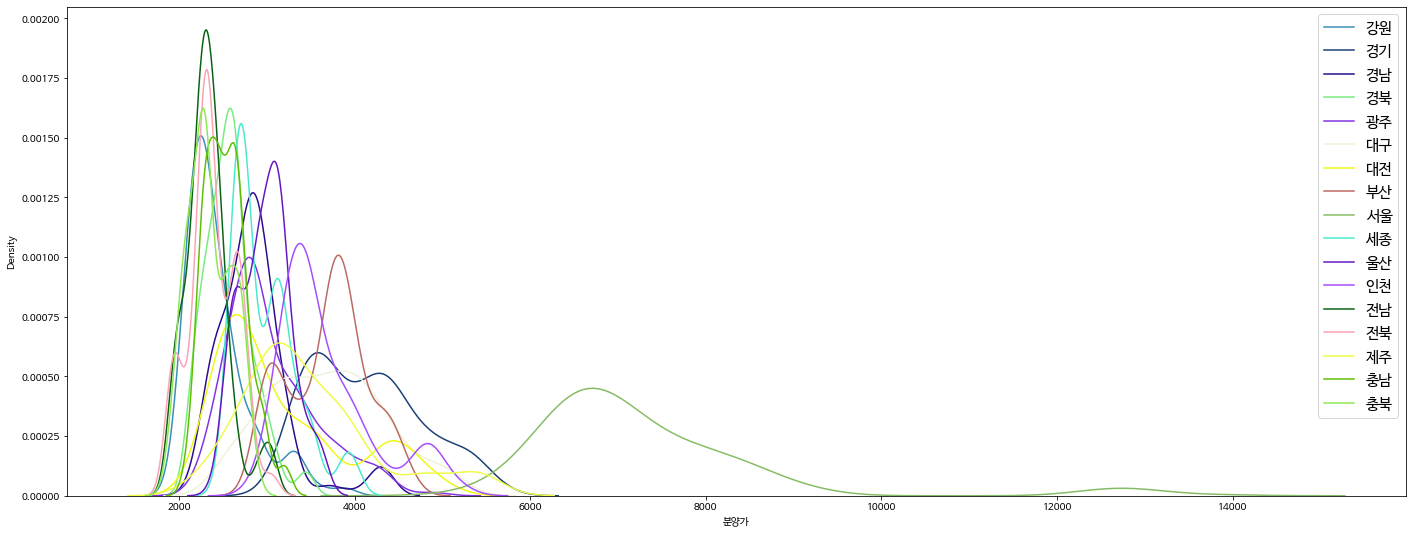

In [9]:
#seaborn으로도 해보기

import seaborn as sns

region_list = house_df.groupby('지역').agg('count').index
for i in range(len(region_list)):
  sns.kdeplot(
    house_df[house_df['지역']==region_list[i]]['분양가'],
    color = (random.random(),random.random(),random.random()),
    label= region_list[i]
  )
plt.rcParams['figure.figsize'] = (24, 9)
plt.legend(fontsize=15)
plt.show()